In [1]:
import torch
from torchvision import datasets, transforms
from torchvision.io import decode_image
from torch.utils.data import DataLoader, Dataset

import numpy as np

import matplotlib.pyplot as plt

from PIL import Image
from pathlib import Path

import os

from model import MLP
from data import GenerativeImageDataset

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.89MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 233kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 875kB/s]


In [2]:
# extract zeros + Resize + Store
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Resize(14))

save_dir = Path("./mnist_zeros")
save_dir.mkdir(parents=True, exist_ok=True)

count = 0
for idx, (img, label) in enumerate(mnist):
    if label == 0:
        img.save(save_dir / f"zero_{count}.png")
        count += 1



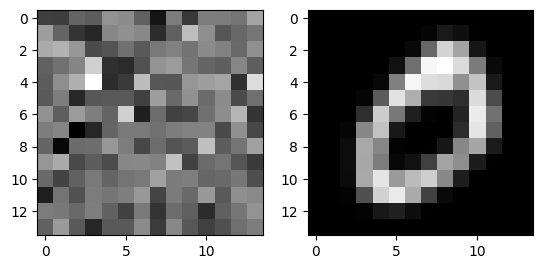

In [3]:
dataset = GenerativeImageDataset('mnist_zeros')
img = dataset[0][0]
noise = dataset[0][1]

noise_norm = (noise + torch.min(noise))/(torch.max(noise) - torch.min(noise))

fig, ax = plt.subplots(1,2)
ax[0].imshow(noise_norm[0], cmap='grey')
ax[1].imshow(img[0], cmap='grey')

In [8]:
dataloader = DataLoader(dataset, 16, drop_last=True)

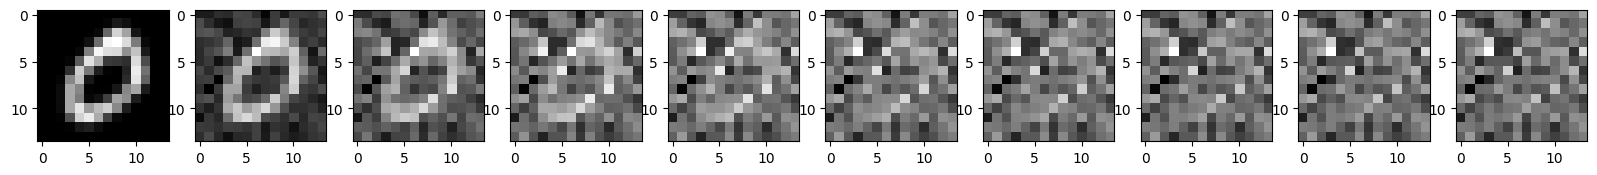

In [9]:
timeline = np.linspace(0, 1, 10)
img, noise = dataset[0]


images = []
fig, ax = plt.subplots(1,10, figsize=(20,40))

for i, t in enumerate(timeline):

    im = t*noise + (1-t)*img
    im = (im - torch.min(im))/(torch.max(im) - torch.min(im))
    images.append(images)

    ax[i].imshow(im[0], cmap='grey')




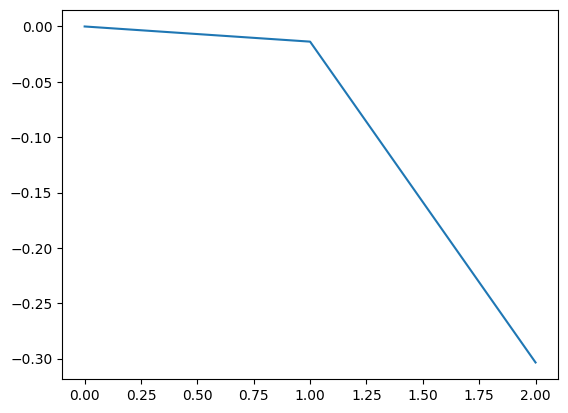

In [ ]:
model = MLP(14*14+1,512,1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 10
timeline = np.linspace(0, 1, 10)

losses = [0]

for epoch in range(epochs):

    epoch_loss = 0
    for i, (img_batch, noise_batch) in enumerate(dataloader): 

        optimizer.zero_grad()

        flat_img_batch = img_batch.flatten(start_dim=1)
        flat_noise_batch = noise_batch.flatten(start_dim=1)

        timeline = torch.linspace(0.1,0.9,9)

        loss = model.action_loss(flat_img_batch, flat_noise_batch, timeline)
        epoch_loss += loss

    epoch_loss = epoch_loss/len(dataloader)

    epoch_loss.backward()
    optimizer.step()

    losses.append(epoch_loss.item())

plt.plot(losses)

## Image Generation

In [ ]:
# create noise
